### Proyecto Analisis de Datos 
## Mushroom Dataset

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import seaborn as sns

## 1. Descripción del Problema

La intoxicación por consumo de hongos venenosos representa un problema de salud pública significativo a nivel mundial. Cada año, miles de personas sufren envenenamiento por consumir hongos silvestres que confunden con especies comestibles. La identificación incorrecta de hongos puede tener consecuencias graves, incluyendo daño hepático, fallo renal e incluso la muerte.

**Problemática:**
- La identificación visual de hongos comestibles vs. venenosos requiere conocimiento especializado
- Muchas especies venenosas tienen características similares a especies comestibles
- Los recolectores aficionados carecen de herramientas confiables para la clasificación

**Objetivo del Proyecto:**
Desarrollar un modelo predictivo basado en machine learning que pueda clasificar hongos como **comestibles (e)** o **venenosos (p)** utilizando sus características físicas observables. Este modelo busca proporcionar una herramienta de apoyo para la identificación segura de hongos, reduciendo el riesgo de intoxicaciones.

**Relevancia:**
- Salud pública: Prevención de intoxicaciones
- Educación: Herramienta didáctica para micólogos y aficionados
- Aplicación práctica: Posible implementación en apps móviles de identificación

## 2. Descripción del Conjunto de Datos

### Origen y Características Generales

El dataset utilizado en este proyecto proviene del **UCI Machine Learning Repository** y está específicamente enfocado en la clasificación de hongos. Utilizamos el **Secondary Mushroom Dataset**, que contiene datos expandidos generados a partir de un conjunto primario de 173 especies de hongos.

**Especificaciones del Dataset:**
- **Nombre:** Secondary Mushroom Dataset
- **Fuente:** UCI Machine Learning Repository
- **Tamaño:** 61,069 registros (353 muestras hipotéticas por cada una de las 173 especies)
- **Número de variables:** 21 columnas
- **Formato:** CSV con delimitador punto y coma (`,`)


## Variables del Dataset 

### Variable Objetivo
| Variable | Tipo | Subtipo | Valores Posibles | Descripción |
|----------|------|---------|------------------|-------------|
| **class** | Categórica | Nominal | `e` = edible (comestible)<br>`p` = poisonous (venenoso) | Clasificación del hongo como comestible o venenoso |

---

### Variables Numéricas Continuas (3 variables)
| Variable | Tipo | Subtipo | Unidad | Descripción |
|----------|------|---------|--------|-------------|
| **cap-diameter** | Numérica | Continua | cm | Diámetro del sombrero del hongo |
| **stem-height** | Numérica | Continua | cm | Altura del tallo del hongo |
| **stem-width** | Numérica | Continua | mm | Ancho del tallo del hongo |

---

### Variables Categóricas Ordinales (2 variables)
Estas variables tienen un orden natural:

| Variable | Tipo | Subtipo | Valores Posibles | Descripción | Orden |
|----------|------|---------|------------------|-------------|-------|
| **gill-spacing** | Categórica | Ordinal | `c` = close (cercano)<br>`d` = distant (distante)<br>`f` = none (ninguno) | Espaciado entre las láminas | close < distant < none |
| **season** | Categórica | Ordinal | `s` = spring (primavera)<br>`u` = summer (verano)<br>`a` = autumn (otoño)<br>`w` = winter (invierno) | Estación del año en que se encuentra | spring → summer → autumn → winter |

---

### Variables Categóricas Nominales (15 variables)
Estas variables no tienen un orden natural inherente:

#### Variables del Sombrero (Cap)
| Variable | Tipo | Subtipo | Valores Posibles | Descripción |
|----------|------|---------|------------------|-------------|
| **cap-shape** | Categórica | Nominal | `b` = bell (campana)<br>`c` = conical (cónico)<br>`x` = convex (convexo)<br>`f` = flat (plano)<br>`s` = sunken (hundido)<br>`p` = spherical (esférico)<br>`o` = others (otros) | Forma del sombrero |
| **cap-surface** | Categórica | Nominal | `i` = fibrous (fibroso)<br>`g` = grooves (ranuras)<br>`y` = scaly (escamoso)<br>`s` = smooth (liso)<br>`h` = shiny (brillante)<br>`l` = leathery (coriáceo)<br>`k` = silky (sedoso)<br>`t` = sticky (pegajoso)<br>`w` = wrinkled (arrugado)<br>`e` = fleshy (carnoso) | Textura de la superficie del sombrero |
| **cap-color** | Categórica | Nominal | `n` = brown (marrón)<br>`b` = buff (beige)<br>`g` = gray (gris)<br>`r` = green (verde)<br>`p` = pink (rosa)<br>`u` = purple (púrpura)<br>`e` = red (rojo)<br>`w` = white (blanco)<br>`y` = yellow (amarillo)<br>`l` = blue (azul)<br>`o` = orange (naranja)<br>`k` = black (negro) | Color del sombrero |
| **does-bruise-or-bleed** | Categórica | Nominal | `t` = bruises or bleeding (magulladuras o sangrado)<br>`f` = no | Indica si el hongo se magulla o sangra al tocarlo |

#### Variables de las Láminas (Gill)
| Variable | Tipo | Subtipo | Valores Posibles | Descripción |
|----------|------|---------|------------------|-------------|
| **gill-attachment** | Categórica | Nominal | `a` = adnate (adnado)<br>`x` = adnexed (adnexo)<br>`d` = decurrent (decurrente)<br>`e` = free (libre)<br>`s` = sinuate (sinuado)<br>`p` = pores (poros)<br>`f` = none (ninguno)<br>`?` = unknown (desconocido) | Tipo de unión de las láminas al tallo |
| **gill-color** | Categórica | Nominal | Mismos valores que cap-color + `f` = none | Color de las láminas |

#### Variables del Tallo (Stem)
| Variable | Tipo | Subtipo | Valores Posibles | Descripción |
|----------|------|---------|------------------|-------------|
| **stem-root** | Categórica | Nominal | `b` = bulbous (bulboso)<br>`s` = swollen (hinchado)<br>`c` = club (forma de mazo)<br>`u` = cup (copa)<br>`e` = equal (igual)<br>`z` = rhizomorphs (rizomorfos)<br>`r` = rooted (con raíz) | Tipo de raíz del tallo |
| **stem-surface** | Categórica | Nominal | Mismos valores que cap-surface + `f` = none | Textura de la superficie del tallo |
| **stem-color** | Categórica | Nominal | Mismos valores que cap-color + `f` = none | Color del tallo |

#### Variables del Velo (Veil)
| Variable | Tipo | Subtipo | Valores Posibles | Descripción |
|----------|------|---------|------------------|-------------|
| **veil-type** | Categórica | Nominal | `p` = partial (parcial)<br>`u` = universal (universal) | Tipo de velo |
| **veil-color** | Categórica | Nominal | Mismos valores que cap-color + `f` = none | Color del velo |

#### Variables del Anillo (Ring)
| Variable | Tipo | Subtipo | Valores Posibles | Descripción |
|----------|------|---------|------------------|-------------|
| **has-ring** | Categórica | Nominal | `t` = ring (tiene anillo)<br>`f` = none (no tiene) | Indica si el hongo tiene anillo |
| **ring-type** | Categórica | Nominal | `c` = cobwebby (telaraña)<br>`e` = evanescent (evanescente)<br>`r` = flaring (acampanado)<br>`g` = grooved (ranurado)<br>`l` = large (grande)<br>`p` = pendant (colgante)<br>`s` = sheathing (envainado)<br>`z` = zone (zona)<br>`y` = scaly (escamoso)<br>`m` = movable (movible)<br>`f` = none (ninguno)<br>`?` = unknown (desconocido) | Tipo de anillo presente |

#### Variables de Esporas y Hábitat
| Variable | Tipo | Subtipo | Valores Posibles | Descripción |
|----------|------|---------|------------------|-------------|
| **spore-print-color** | Categórica | Nominal | Mismos valores que cap-color | Color de la impresión de esporas |
| **habitat** | Categórica | Nominal | `g` = grasses (pastos)<br>`l` = leaves (hojas)<br>`m` = meadows (praderas)<br>`p` = paths (caminos)<br>`h` = heaths (brezales)<br>`u` = urban (urbano)<br>`w` = waste (desechos)<br>`d` = woods (bosques) | Hábitat donde crece el hongo |

## Importar Dataset

In [3]:
df = pd.read_csv('MushroomDataset/MushroomDataset.csv', low_memory=False, sep=',')

#### Primeras Observaciones

In [4]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,NaN,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.6,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,NaN,NaN,o,f,e,NaN,w,17.80,...,s,NaN,w,NaN,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,NaN,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,NaN


In [5]:
len(df)

61079

In [6]:
columnas = list(df.columns)
print(columnas)

['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


# 3. Calidad de datos

### 3.1 Análisis de Nulos

In [7]:
# Análisis de valores nulos
nulos = df.isnull().sum()
nulos_df = pd.DataFrame({
    'Variable': nulos.index,
    'Valores Nulos': nulos.values,
    'Porcentaje (%)': (nulos.values / len(df) * 100).round(2)
})

# Filtrar solo las variables con valores nulos
nulos_df = nulos_df[nulos_df['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)

print(f"Total de registros en el dataset: {len(df)}")
print(f"\nVariables con valores nulos: {len(nulos_df)}")
print(f"Variables sin valores nulos: {len(df.columns) - len(nulos_df)}")
print("\n" + "="*60)
print("\nDetalle de valores nulos por variable:\n")
print(nulos_df.to_string(index=False))

Total de registros en el dataset: 61079

Variables con valores nulos: 21
Variables sin valores nulos: 0


Detalle de valores nulos por variable:

            Variable  Valores Nulos  Porcentaje (%)
           veil-type          58066           95.07
   spore-print-color          55050           90.13
          veil-color          54045           88.48
           stem-root          52044           85.21
        stem-surface          39333           64.40
        gill-spacing          26875           44.00
         cap-surface          16470           26.97
     gill-attachment          12440           20.37
           ring-type           5394            8.83
           cap-color           3055            5.00
does-bruise-or-bleed           3054            5.00
            has-ring           3054            5.00
          stem-color           3054            5.00
               class           3053            5.00
             habitat           3053            5.00
              season  

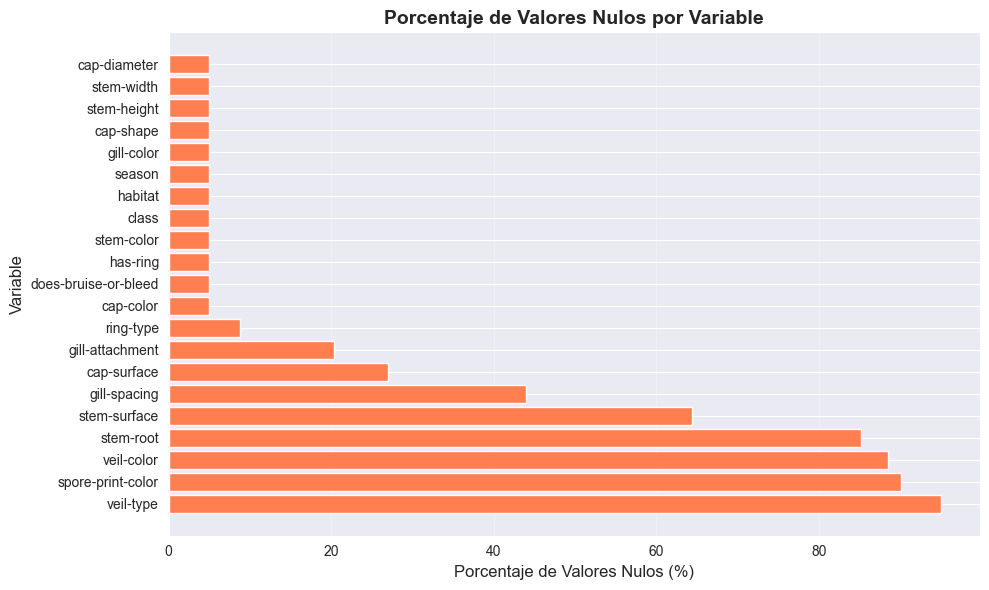

In [8]:
# Visualización de valores nulos
if len(nulos_df) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(nulos_df['Variable'], nulos_df['Porcentaje (%)'], color='coral')
    plt.xlabel('Porcentaje de Valores Nulos (%)', fontsize=12)
    plt.ylabel('Variable', fontsize=12)
    plt.title('Porcentaje de Valores Nulos por Variable', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores nulos en el dataset")

In [9]:
# Contar valores nulos por fila
nulos_por_fila = df.isnull().sum(axis=1)

# Crear un resumen de la distribución de nulos por fila
distribucion_nulos = nulos_por_fila.value_counts().sort_index()

print("Distribución de valores nulos por fila:")
print("="*60)
for num_nulos, cantidad_filas in distribucion_nulos.items():
    porcentaje = round(cantidad_filas / len(df) * 100, 2)
    print(f"Filas con {num_nulos} valores nulos: {cantidad_filas} ({porcentaje}%)")

# Filtrar filas con más de un valor nulo
filas_multiples_nulos = nulos_por_fila[nulos_por_fila >= 1]

print("\n" + "="*60)
if len(filas_multiples_nulos) > 0:
    print(f"\nSe encontraron {len(filas_multiples_nulos)} filas con más de un valor nulo")
    print(f"Porcentaje: {round(len(filas_multiples_nulos) / len(df) * 100, 2)}%")
    print(f"\nDistribución de nulos en estas filas:")
    print(filas_multiples_nulos.value_counts().sort_index())
else:
    print("\nNo hay filas con más de un valor nulo")

Distribución de valores nulos por fila:
Filas con 2 valores nulos: 389 (0.64%)
Filas con 3 valores nulos: 2091 (3.42%)
Filas con 4 valores nulos: 6921 (11.33%)
Filas con 5 valores nulos: 15388 (25.19%)
Filas con 6 valores nulos: 17934 (29.36%)
Filas con 7 valores nulos: 11849 (19.4%)
Filas con 8 valores nulos: 4897 (8.02%)
Filas con 9 valores nulos: 1302 (2.13%)
Filas con 10 valores nulos: 254 (0.42%)
Filas con 11 valores nulos: 49 (0.08%)
Filas con 12 valores nulos: 5 (0.01%)


Se encontraron 61079 filas con más de un valor nulo
Porcentaje: 100.0%

Distribución de nulos en estas filas:
2       389
3      2091
4      6921
5     15388
6     17934
7     11849
8      4897
9      1302
10      254
11       49
12        5
Name: count, dtype: int64


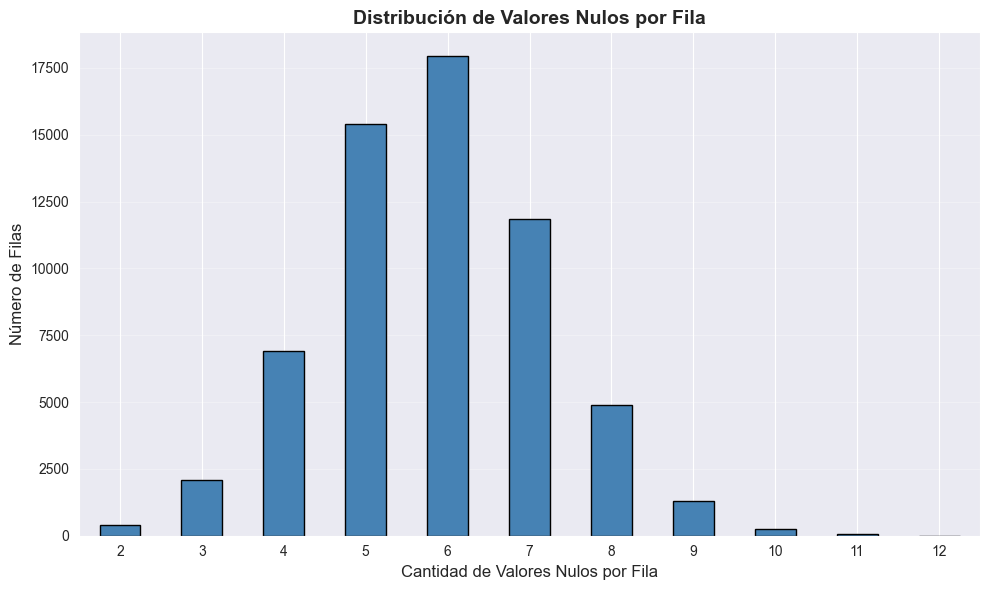

In [10]:
# Visualización de la distribución de nulos por fila
plt.figure(figsize=(10, 6))
distribucion_nulos.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Cantidad de Valores Nulos por Fila', fontsize=12)
plt.ylabel('Número de Filas', fontsize=12)
plt.title('Distribución de Valores Nulos por Fila', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 3.2 Análisis de Duplicados

In [11]:
# Análisis de duplicados
duplicados_totales = df.duplicated().sum()
porcentaje_duplicados = (duplicados_totales / len(df) * 100).round(2)

print(f"Total de registros: {len(df)}")
print(f"Registros duplicados: {duplicados_totales}")
print(f"Porcentaje de duplicados: {porcentaje_duplicados}%")
print(f"Registros únicos: {len(df) - duplicados_totales}")

if duplicados_totales > 0:
    print(f"\nHay {duplicados_totales} registros duplicados")
else:
    print("\nNo hay registros duplicados en el dataset")

Total de registros: 61079
Registros duplicados: 45
Porcentaje de duplicados: 0.07%
Registros únicos: 61034

Hay 45 registros duplicados


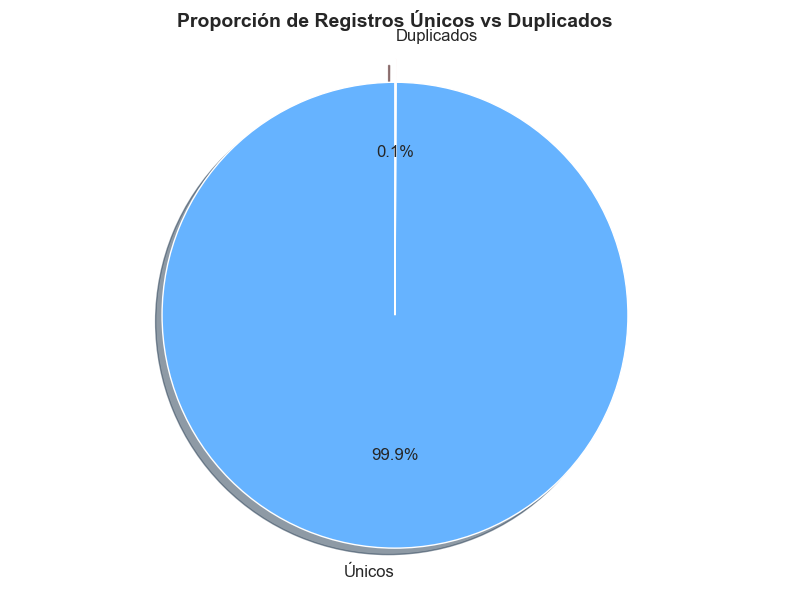

In [12]:
# Visualización de duplicados vs únicos
if duplicados_totales > 0:
    plt.figure(figsize=(8, 6))
    labels = ['Únicos', 'Duplicados']
    sizes = [len(df) - duplicados_totales, duplicados_totales]
    colors = ['#66b3ff', '#ff6666']
    explode = (0.05, 0.05)
    
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 12})
    plt.title('Proporción de Registros Únicos vs Duplicados', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

### 3.3 Análisis de Formato

In [13]:
print("="*70)
print("TIPOS DE DATOS EN EL DATASET")
print("="*70)
print("\nInfo general del dataframe:")
df.info()

print("\n" + "="*70)
print("Resumen de tipos de datos:")
print("="*70)
tipos = df.dtypes.value_counts()
for tipo, cantidad in tipos.items():
    print(f"{tipo}: {cantidad} columnas")

TIPOS DE DATOS EN EL DATASET

Info general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61079 entries, 0 to 61078
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 58026 non-null  object 
 1   cap-diameter          58070 non-null  object 
 2   cap-shape             58026 non-null  object 
 3   cap-surface           44609 non-null  object 
 4   cap-color             58024 non-null  object 
 5   does-bruise-or-bleed  58025 non-null  object 
 6   gill-attachment       48639 non-null  object 
 7   gill-spacing          34204 non-null  object 
 8   gill-color            58026 non-null  object 
 9   stem-height           58052 non-null  float64
 10  stem-width            58059 non-null  float64
 11  stem-root             9035 non-null   object 
 12  stem-surface          21746 non-null  object 
 13  stem-color            58025 non-null  object 
 14  veil-type   

#### 3.3.1 Variables Continuas

Hay 3 variables continuas, por ende debería haber 3 variables con Dtype float64. Cap-diameter esta mal. Procedemos a analizar porque esta mal

In [14]:
# cap-diameter es tipo 'object' cuando debería ser float


print("cap-diameter")
print("="*70)

df_temp = df['cap-diameter'].copy()
print(f"\nTipo original: {df_temp.dtype}")

valores_no_nulos = df_temp.dropna()
print(f"\nTotal valores no nulos: {len(valores_no_nulos)}")

# Busquemos valores que no sean numéricos
valores_str = []
for val in valores_no_nulos.head(100):  # Chequeamos los primeros 100
    try:
        float(val)
    except:
        valores_str.append(val)

if valores_str:
    print(f"\nValores NO numéricos encontrados en los primeros 100: {valores_str}")
else:
    print("\nEn los primeros 100 valores, todos parecen convertibles a float...")
    
# Veamos todos los valores únicos 
print(f"\nCantidad de valores únicos: {df['cap-diameter'].nunique()}")
print("\nPrimeros 20 valores únicos:")
print(df['cap-diameter'].unique()[:20])

cap-diameter

Tipo original: object

Total valores no nulos: 58070

En los primeros 100 valores, todos parecen convertibles a float...

Cantidad de valores únicos: 2528

Primeros 20 valores únicos:
['15.26' '16.6' '14.07' '14.17' '14.64' '15.34' '14.85' '14.86' '12.85'
 '13.55' '13.4' '17.37' '16.56' '15.37' '15.54' '15.19' '17.4' '16.16'
 '623.4000000000001' '13.0']


In [15]:
print("CONVERSIÓN A NUMÉRICO ")
print("="*70)
vars_numericas = ['cap-diameter', 'stem-height', 'stem-width']

for var in vars_numericas:
    print(f"\n{var}:")
    print("-"*50)
    
    # Intentamos convertir, forzando errores a NaN
    convertido = pd.to_numeric(df[var], errors='coerce')
    
    # Comparamos cuántos NaN teníamos originalmente vs después de convertir
    nulos_originales = df[var].isnull().sum()
    nulos_post_conversion = convertido.isnull().sum()
    valores_problematicos = nulos_post_conversion - nulos_originales
    
    print(f"  NaN originales: {nulos_originales}")
    print(f"  NaN después de conversión: {nulos_post_conversion}")
    print(f"  Valores no convertibles: {valores_problematicos}")
    
    if valores_problematicos > 0:
        print(f" Hay {valores_problematicos} valores que no son numéricos válidos")
        
        # Identifiquemos cuáles son esos valores
        mascara_problematicos = df[var].notnull() & convertido.isnull()
        valores_raros = df.loc[mascara_problematicos, var].unique()
        print(f"  Valores problemáticos únicos: {valores_raros[:10]}")  # Mostramos los primeros 10
        
        # Contemos cuántas veces aparece cada uno
        print(f"\n  Frecuencia de valores problemáticos:")
        for val in valores_raros[:5]: 
            count = (df[var] == val).sum()
            print(f"    '{val}': {count} veces ({count/len(df)*100:.3f}%)")
    else:
        print(f"Todos los valores no nulos son numéricos válidos")

CONVERSIÓN A NUMÉRICO 

cap-diameter:
--------------------------------------------------
  NaN originales: 3009
  NaN después de conversión: 3620
  Valores no convertibles: 611
 Hay 611 valores que no son numéricos válidos
  Valores problemáticos únicos: ['invalid_value']

  Frecuencia de valores problemáticos:
    'invalid_value': 611 veces (1.000%)

stem-height:
--------------------------------------------------
  NaN originales: 3027
  NaN después de conversión: 3027
  Valores no convertibles: 0
Todos los valores no nulos son numéricos válidos

stem-width:
--------------------------------------------------
  NaN originales: 3020
  NaN después de conversión: 3020
  Valores no convertibles: 0
Todos los valores no nulos son numéricos válidos


In [16]:
# cap-diameter tiene valores 'invalid_value'

print("ANÁLISIS DE VALORES 'invalid_value' EN cap-diameter")
print("="*70)

# Filtremos las filas con 'invalid_value'
filas_invalidas = df[df['cap-diameter'] == 'invalid_value']
print(f"\nTotal de filas con 'invalid_value': {len(filas_invalidas)}")
print(f"Porcentaje del dataset: {len(filas_invalidas)/len(df)*100:.2f}%")

# Ejemplos
print("\nPrimeras 5 filas con 'invalid_value' en cap-diameter:")
print(filas_invalidas.head())

# Ver si tiene alguna relación con otras variables
print("\n" + "-"*70)
print("Distribución por clase (edible/poisonous):")
print(filas_invalidas['class'].value_counts())

print("\nDistribución por hábitat:")
print(filas_invalidas['habitat'].value_counts())

ANÁLISIS DE VALORES 'invalid_value' EN cap-diameter

Total de filas con 'invalid_value': 611
Porcentaje del dataset: 1.00%

Primeras 5 filas con 'invalid_value' en cap-diameter:
     class   cap-diameter cap-shape cap-surface cap-color  \
103      p  invalid_value         x           g         o   
836      p  invalid_value         f         NaN         g   
844      p  invalid_value         f         NaN         g   
1032     p  invalid_value       NaN         NaN         n   
1037     p  invalid_value         f         NaN         g   

     does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
103                     f               e          NaN          w   
836                     f               e          NaN          w   
844                     f               e          NaN          w   
1032                    f               e          NaN          w   
1037                    f               e          NaN          w   

      stem-height  ...  stem-root stem-s

In [17]:
# Función para detectar outliers usando método IQR × 3 (mismo que Limpieza_Datos.ipynb)
def detectar_outliers_iqr(serie, factor=3):
    """Detecta outliers usando método IQR × factor (por defecto 3)."""
    # Calcular estadísticas solo sobre valores no nulos
    valores_no_nulos = serie.dropna()
    Q1 = valores_no_nulos.quantile(0.25)
    Q3 = valores_no_nulos.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - factor * IQR
    lim_sup = Q3 + factor * IQR
    
    # Crear máscara de outliers
    outliers = (serie < lim_inf) | (serie > lim_sup)
    
    return outliers, lim_inf, lim_sup

# Veamos las estadísticas descriptivas de las variables numéricas (excluyendo los valores inválidos)

print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*70)

for var in vars_numericas:
    print(f"\n{var.upper()}")
    print("-"*70)
    
    # Convertir a numérico
    valores_numericos = pd.to_numeric(df[var], errors='coerce')
    
    # Estadísticas
    print(f"Count (valores válidos): {valores_numericos.count()}")
    print(f"Mean: {valores_numericos.mean():.2f}")
    print(f"Std: {valores_numericos.std():.2f}")
    print(f"Min: {valores_numericos.min():.2f}")
    print(f"25%: {valores_numericos.quantile(0.25):.2f}")
    print(f"50% (Median): {valores_numericos.quantile(0.50):.2f}")
    print(f"75%: {valores_numericos.quantile(0.75):.2f}")
    print(f"Max: {valores_numericos.max():.2f}")
    
    # Detectar outliers usando método IQR × 3
    outliers, lim_inf, lim_sup = detectar_outliers_iqr(valores_numericos, factor=3)
    num_outliers = outliers.sum()
    
    if num_outliers > 0:
        print(f"\n Outliers detectados (IQR × 3):")
        print(f"   Límite inferior: {lim_inf:.2f}")
        print(f"   Límite superior: {lim_sup:.2f}")
        print(f"   Cantidad: {num_outliers} ({num_outliers/valores_numericos.count()*100:.2f}%)")
        print(f"   Valor máximo outlier: {valores_numericos[outliers].max():.2f}")
        print(f"   Valor mínimo outlier: {valores_numericos[outliers].min():.2f}")
    else:
        print(f"\n No se detectaron outliers extremos (IQR × 3)")
    
    if valores_numericos.min() < 0:
        print(f"\n Valor negativo detectado (no tiene sentido físico)")

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS

CAP-DIAMETER
----------------------------------------------------------------------
Count (valores válidos): 57459
Mean: 13.23
Std: 63.21
Min: 0.38
25%: 3.50
50% (Median): 5.92
75%: 8.65
Max: 623.40

 Outliers detectados (IQR × 3):
   Límite inferior: -11.95
   Límite superior: 24.10
   Cantidad: 995 (1.73%)
   Valor máximo outlier: 623.40
   Valor mínimo outlier: 24.12

STEM-HEIGHT
----------------------------------------------------------------------
Count (valores válidos): 58052
Mean: 10.08
Std: 34.11
Min: 0.00
25%: 4.65
50% (Median): 5.98
75%: 7.82
Max: 339.20

 Outliers detectados (IQR × 3):
   Límite inferior: -4.86
   Límite superior: 17.33
   Cantidad: 1569 (2.70%)
   Valor máximo outlier: 339.20
   Valor mínimo outlier: 17.34

STEM-WIDTH
----------------------------------------------------------------------
Count (valores válidos): 58059
Mean: 22.96
Std: 105.27
Min: 0.00
25%: 5.26
50% (Median): 10.32
75%: 16.81
Max: 1039.10

 O

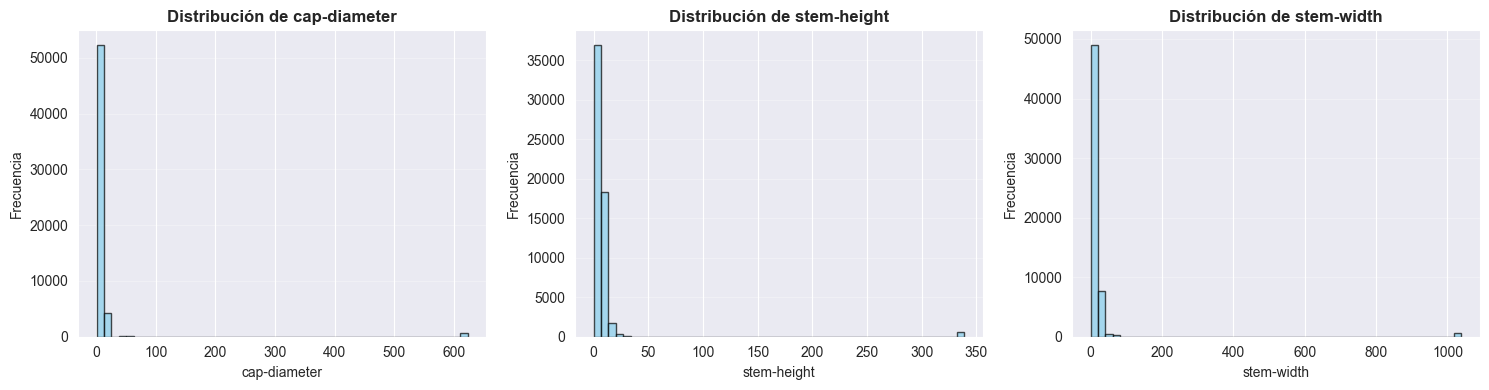

Nota: Se excluyeron los valores no numéricos y NaN para la visualización


In [18]:
# Visualicemos las distribuciones de las variables numéricas

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, var in enumerate(vars_numericas):
    # Convertir a numérico
    valores_numericos = pd.to_numeric(df[var], errors='coerce').dropna()
    
    # Histograma
    axes[idx].hist(valores_numericos, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(var, fontsize=10)
    axes[idx].set_ylabel('Frecuencia', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Nota: Se excluyeron los valores no numéricos y NaN para la visualización")

#### 3.3.2 Variables Categóricas

In [19]:
# Definamos los valores esperados según la metadata para cada variable categórica

valores_esperados = {
    'class': ['e', 'p'],
    'cap-shape': ['b', 'c', 'x', 'f', 's', 'p', 'o'],
    'cap-surface': ['i', 'g', 'y', 's', 'h', 'l', 'k', 't', 'w', 'e'],
    'cap-color': ['n', 'b', 'g', 'r', 'p', 'u', 'e', 'w', 'y', 'l', 'o', 'k'],
    'does-bruise-or-bleed': ['t', 'f'],
    'gill-attachment': ['a', 'x', 'd', 'e', 's', 'p', 'f', '?'],
    'gill-spacing': ['c', 'd', 'f'],
    'gill-color': ['n', 'b', 'g', 'r', 'p', 'u', 'e', 'w', 'y', 'l', 'o', 'k', 'f'],
    'stem-root': ['b', 's', 'c', 'u', 'e', 'z', 'r'],
    'stem-surface': ['i', 'g', 'y', 's', 'h', 'l', 'k', 't', 'w', 'e', 'f'],
    'stem-color': ['n', 'b', 'g', 'r', 'p', 'u', 'e', 'w', 'y', 'l', 'o', 'k', 'f'],
    'veil-type': ['p', 'u'],
    'veil-color': ['n', 'b', 'g', 'r', 'p', 'u', 'e', 'w', 'y', 'l', 'o', 'k', 'f'],
    'has-ring': ['t', 'f'],
    'ring-type': ['c', 'e', 'r', 'g', 'l', 'p', 's', 'z', 'y', 'm', 'f', '?'],
    'spore-print-color': ['n', 'b', 'g', 'r', 'p', 'u', 'e', 'w', 'y', 'l', 'o', 'k'],
    'habitat': ['g', 'l', 'm', 'p', 'h', 'u', 'w', 'd'],
    'season': ['s', 'u', 'a', 'w']
}

print("Valores esperados definidos para", len(valores_esperados), "variables categóricas")

Valores esperados definidos para 18 variables categóricas


In [20]:
# Inicializamos la lista para registrar problemas de formato
problemas = []

print("Inicializada lista 'problemas' para registrar anomalías de formato")

Inicializada lista 'problemas' para registrar anomalías de formato


In [21]:
# Verifiquemos cada variable categórica contra sus valores esperados

print("VERIFICACIÓN DE FORMATO - VARIABLES CATEGÓRICAS")
print("="*70)

for var, esperados in valores_esperados.items():
    print(f"\n{var.upper()}")
    print("-"*70)
    
    # Obtener valores únicos reales (sin contar NaN)
    valores_reales = set(df[var].dropna().unique())
    esperados_set = set(esperados)
    
    print(f"Valores esperados: {sorted(esperados_set)}")
    print(f"Valores reales únicos: {sorted(valores_reales)}")
    print(f"Cantidad de valores únicos: {len(valores_reales)}")
    
    # Valores inesperados (en datos pero no en metadata)
    valores_inesperados = valores_reales - esperados_set
    
    # Valores faltantes (en metadata pero no en datos)
    valores_faltantes = esperados_set - valores_reales
    
    if valores_inesperados:
        print(f"\nValores no definidos en la metadata: {sorted(valores_inesperados)}")
        print(valores_inesperados)
        problemas.append((var, 'inesperados', valores_inesperados))
        
        # Contar cuántas filas tienen estos valores
        for val in valores_inesperados:
            count = (df[var] == val).sum()
            print(f"   '{val}': {count} filas ({count/len(df)*100:.3f}%)")
    
    if valores_faltantes:
        print(f"\nValores definidos por la metadata pero no encontrados: {sorted(valores_faltantes)}")
    
    if not valores_inesperados and not valores_faltantes:
        print(f"\nLos valores coinciden con la metadata")

print("\n" + "="*70)
print(f"RESUMEN: {len(problemas)} variables con valores inesperados")

VERIFICACIÓN DE FORMATO - VARIABLES CATEGÓRICAS

CLASS
----------------------------------------------------------------------
Valores esperados: ['e', 'p']
Valores reales únicos: ['e', 'p']
Cantidad de valores únicos: 2

Los valores coinciden con la metadata

CAP-SHAPE
----------------------------------------------------------------------
Valores esperados: ['b', 'c', 'f', 'o', 'p', 's', 'x']
Valores reales únicos: ['b', 'c', 'f', 'o', 'p', 's', 'x']
Cantidad de valores únicos: 7

Los valores coinciden con la metadata

CAP-SURFACE
----------------------------------------------------------------------
Valores esperados: ['e', 'g', 'h', 'i', 'k', 'l', 's', 't', 'w', 'y']
Valores reales únicos: ['d', 'e', 'g', 'h', 'i', 'k', 'l', 's', 't', 'w', 'y']
Cantidad de valores únicos: 11

Valores no definidos en la metadata: ['d']
{'d'}
   'd': 4234 filas (6.932%)

CAP-COLOR
----------------------------------------------------------------------
Valores esperados: ['b', 'e', 'g', 'k', 'l', 'n', 'o

#### Interpretación de los resultados

Después de la verificación, encontramos:

1. **Variables con valores inesperados** (códigos que no están en la metadata):
   - `cap-surface`: tiene el código `'d'` que no está documentado
   - `stem-root`: tiene el código `'f'` que no está documentado

2. **Variables con códigos faltantes** (esperados pero no presentes):
   - Varias variables tienen códigos en la metadata que no aparecen en nuestros datos
   - Esto es normal - no todas las categorías posibles tienen que estar presentes


#### Explorando ejemplos de valores inesperados

In [22]:
n = 3
if problemas:
    print("EJEMPLOS DE FILAS CON VALORES INESPERADOS")
    print("="*70)
    
    for var, tipo, valores in problemas[:n]:  # Las n primeras
        print(f"\n{var}:")
        print("-"*70)
        
        for val in list(valores)[:2]:  # Solo 2 valores inesperados por variable
            print(f"\nValor inesperado: '{val}'")
            filas_con_valor = df[df[var] == val]
            print(f"Total de filas: {len(filas_con_valor)}")
            print("\nPrimeras 3 filas:")
            print(filas_con_valor.head(3))
            print()
else:
    print("No hay valores inesperados en las variables categóricas ")

EJEMPLOS DE FILAS CON VALORES INESPERADOS

cap-surface:
----------------------------------------------------------------------

Valor inesperado: 'd'
Total de filas: 4234

Primeras 3 filas:
     class cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
7766     p          3.7         f           d         b                    f   
7767     p         3.46         f           d         n                    f   
7768     p         3.24         f           d         n                    f   

     gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
7766               x            c          y         4.66  ...          b   
7767               x            c          y         4.15  ...          b   
7768               x            c          w         4.16  ...          b   

     stem-surface stem-color veil-type veil-color has-ring ring-type  \
7766            s          n       NaN        NaN        f         f   
7767            s          n       N

### Visualización de variables categóricas

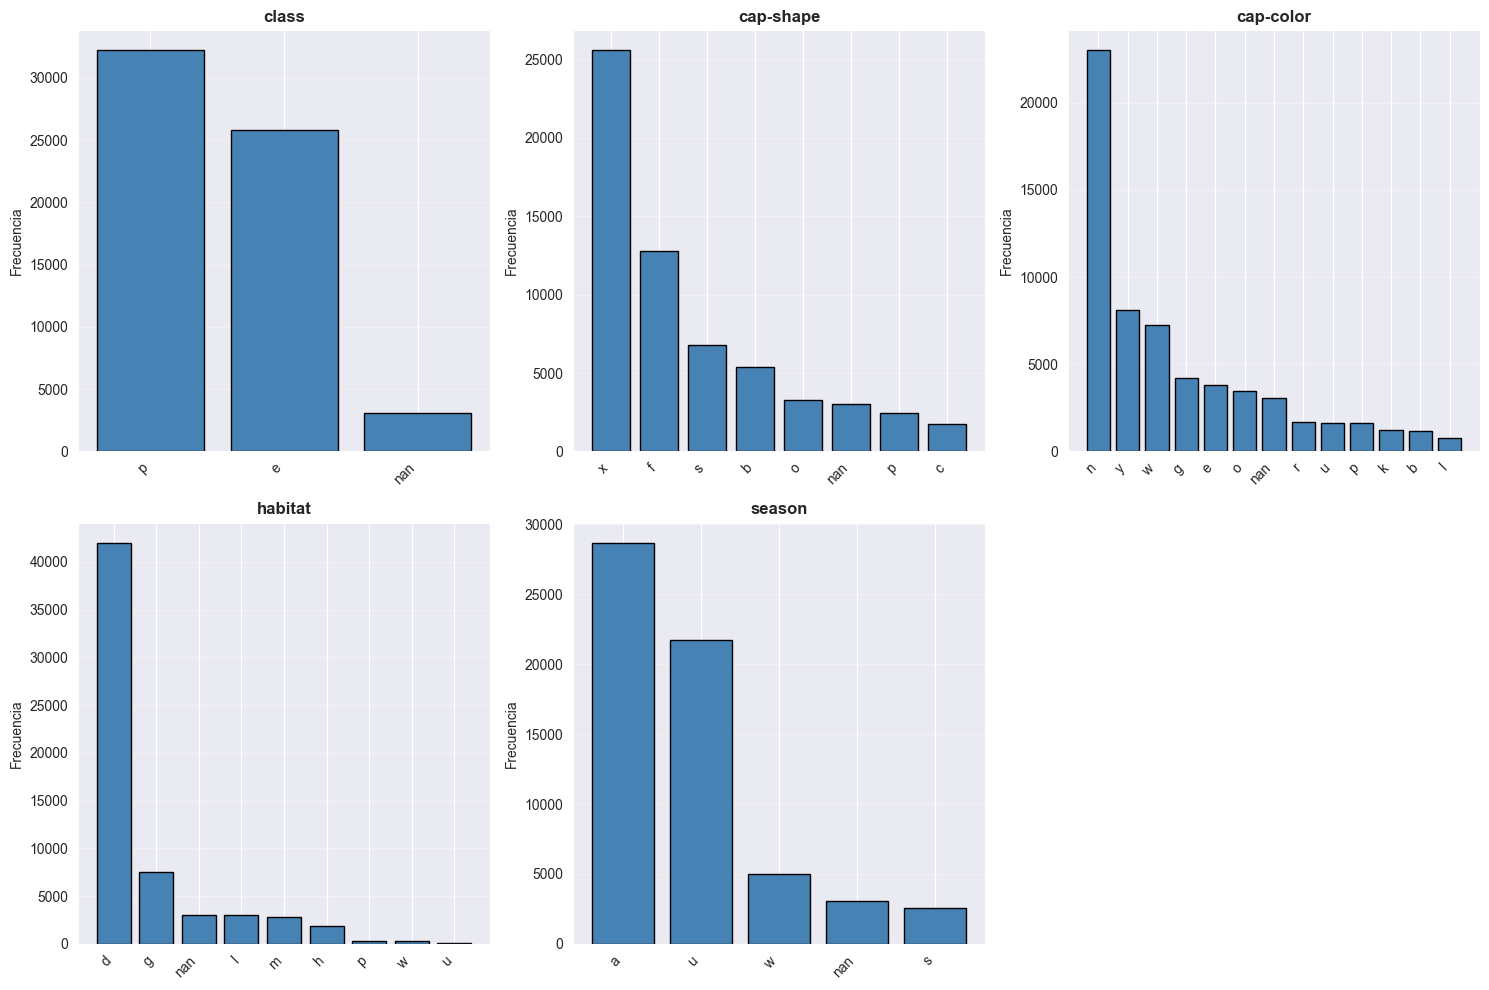

In [23]:
vars_clave = ['class', 'cap-shape', 'cap-color', 'habitat', 'season']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, var in enumerate(vars_clave):
    # Contar valores (incluyendo NaN)
    value_counts = df[var].value_counts(dropna=False)
    
    # Graficar
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'{var}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Frecuencia', fontsize=10)
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels([str(x) for x in value_counts.index], rotation=45, ha='right')
    axes[idx].grid(axis='y', alpha=0.3)

# Eliminar el subplot extra
axes[-1].remove()

plt.tight_layout()
plt.show()

### Verificación adicional: Longitud de los códigos categóricos

Una última verificación: según la metadata, **todos** los códigos categóricos deberían ser de **1 solo carácter** (una letra).

Si encontramos valores con más de 1 carácter, son definitivamente errores. Por ejemplo:
- `'w'` es correcto 
- `'white'` sería incorrecto 

In [24]:
# Por último, verifiquemos si hay problemas de longitud en las variables categóricas
# (todos los códigos deberían ser de 1 carácter según la metadata)

print("VERIFICACIÓN DE LONGITUD DE CÓDIGOS CATEGÓRICOS")
print("="*70)

vars_categoricas = [col for col in df.columns if col not in vars_numericas]

for var in vars_categoricas:
    # Solo valores no nulos
    valores_no_nulos = df[var].dropna()
    
    if len(valores_no_nulos) > 0:
        # Calcular longitudes
        longitudes = valores_no_nulos.astype(str).str.len()
        longitud_min = longitudes.min()
        longitud_max = longitudes.max()
        longitud_mode = longitudes.mode()[0] if len(longitudes.mode()) > 0 else None
        
        # Si la longitud no es consistente de 1 carácter, reportarlo
        if longitud_max > 1 or longitud_min != longitud_max:
            print(f"\n {var}:")
            print(f"   Longitud mínima: {longitud_min}")
            print(f"   Longitud máxima: {longitud_max}")
            print(f"   Longitud más común: {longitud_mode}")
            
            # Mostrar ejemplos de valores largos
            valores_largos = valores_no_nulos[longitudes > 1].unique()
            if len(valores_largos) > 0:
                print(f"   Valores con más de 1 carácter: {valores_largos[:5]}")

print("\n" + "="*70)
print("Verificación completada")

VERIFICACIÓN DE LONGITUD DE CÓDIGOS CATEGÓRICOS

Verificación completada


## 5. CONSOLIDACIÓN Y RESUMEN DE PROBLEMAS

### Consolidación de Problemas Encontrados

Después de verificar variables numéricas y categóricas, vamos a crear un resumen de todos los problemas de formato detectados. Esto incluye:

1. **Valores no numéricos** en variables que deberían ser numéricas
2. **Valores inesperados** en variables categóricas (códigos no documentados en la metadata)
3. **Valores nulos excesivos** (más del 50% de la variable)

In [25]:
# Creemos un resumen completo de problemas de formato
print("="*70)
print("RESUMEN GENERAL DE PROBLEMAS")
print("="*70)

resumen_problemas = []

# 1. Problema en cap-diameter con 'invalid_value'
count_invalid = (df['cap-diameter'] == 'invalid_value').sum()
if count_invalid > 0:
    resumen_problemas.append({
        'Variable': 'cap-diameter',
        'Problema': 'Valores no numéricos',
        'Detalle': f"'{count_invalid}' filas con 'invalid_value'",
        'Porcentaje': f"{count_invalid/len(df)*100:.2f}%"
    })

# 2. Variables categóricas con valores inesperados (de la lista 'problemas')
if problemas:
    for var, tipo, valores in problemas:
        total_afectado = sum((df[var] == val).sum() for val in valores)
        add = {
            'Variable': var,
            'Problema': 'Valores inesperados',
            'Detalle': f"Valores: {list(valores)}",
            'Porcentaje': f"{total_afectado/len(df)*100:.2f}%"
        }
        if add not in resumen_problemas: # No se porque problemas tiene el problema duplicado
            resumen_problemas.append(add)

# 3. Valores nulos excesivos (más del 50%)
for var in df.columns:
    pct_nulos = df[var].isnull().sum() / len(df) * 100
    if pct_nulos > 50:
        resumen_problemas.append({
            'Variable': var,
            'Problema': 'Valores nulos excesivos',
            'Detalle': f'{df[var].isnull().sum()} nulos',
            'Porcentaje': f"{pct_nulos:.2f}%"
        })

# Mostrar el resumen
if resumen_problemas:
    df_resumen = pd.DataFrame(resumen_problemas)
    print(f"\nTotal de problemas detectados: {len(df_resumen)}\n")
    print(df_resumen.to_string(index=False))
else:
    print("\n No se detectaron problemas de formato significativos")

print("\n" + "="*70)

RESUMEN GENERAL DE PROBLEMAS

Total de problemas detectados: 8

         Variable                Problema                         Detalle Porcentaje
     cap-diameter    Valores no numéricos '611' filas con 'invalid_value'      1.00%
      cap-surface     Valores inesperados                  Valores: ['d']      6.93%
        stem-root     Valores inesperados                  Valores: ['f']      1.66%
        stem-root Valores nulos excesivos                     52044 nulos     85.21%
     stem-surface Valores nulos excesivos                     39333 nulos     64.40%
        veil-type Valores nulos excesivos                     58066 nulos     95.07%
       veil-color Valores nulos excesivos                     54045 nulos     88.48%
spore-print-color Valores nulos excesivos                     55050 nulos     90.13%



## 6. ANÁLISIS MULTIVARIADO

### Codificación de Variables Categóricas

Para poder calcular correlaciones entre todas las variables, necesitamos convertir las variables categóricas a numéricas mediante codificación.

In [26]:
# Para calcular correlaciones, necesitamos convertir las variables categóricas a numéricas
from sklearn.preprocessing import LabelEncoder

# Crear una copia del dataframe para no modificar el original
df_encoded = df.copy()

# Identificar columnas categóricas 
columnas_categoricas = df_encoded.select_dtypes(include=['object']).columns

print(f"Codificando {len(columnas_categoricas)} variables categóricas...")
print("Variables categóricas:", list(columnas_categoricas))

# Codificar cada columna categórica
le = LabelEncoder()
for col in columnas_categoricas:
    # Manejar valores nulos temporalmente
    df_encoded[col] = df_encoded[col].fillna('Missing')
    df_encoded[col] = le.fit_transform(df_encoded[col])

Codificando 19 variables categóricas...
Variables categóricas: ['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


### Matriz de Correlación Completa

In [27]:
# Calcular matriz de correlación
correlation_matrix = df_encoded.corr()

print(f"Matriz de correlación: {correlation_matrix.shape[0]} x {correlation_matrix.shape[1]}")
print(f"Total de pares de variables: {correlation_matrix.shape[0] * (correlation_matrix.shape[1] - 1) // 2}")

Matriz de correlación: 21 x 21
Total de pares de variables: 210


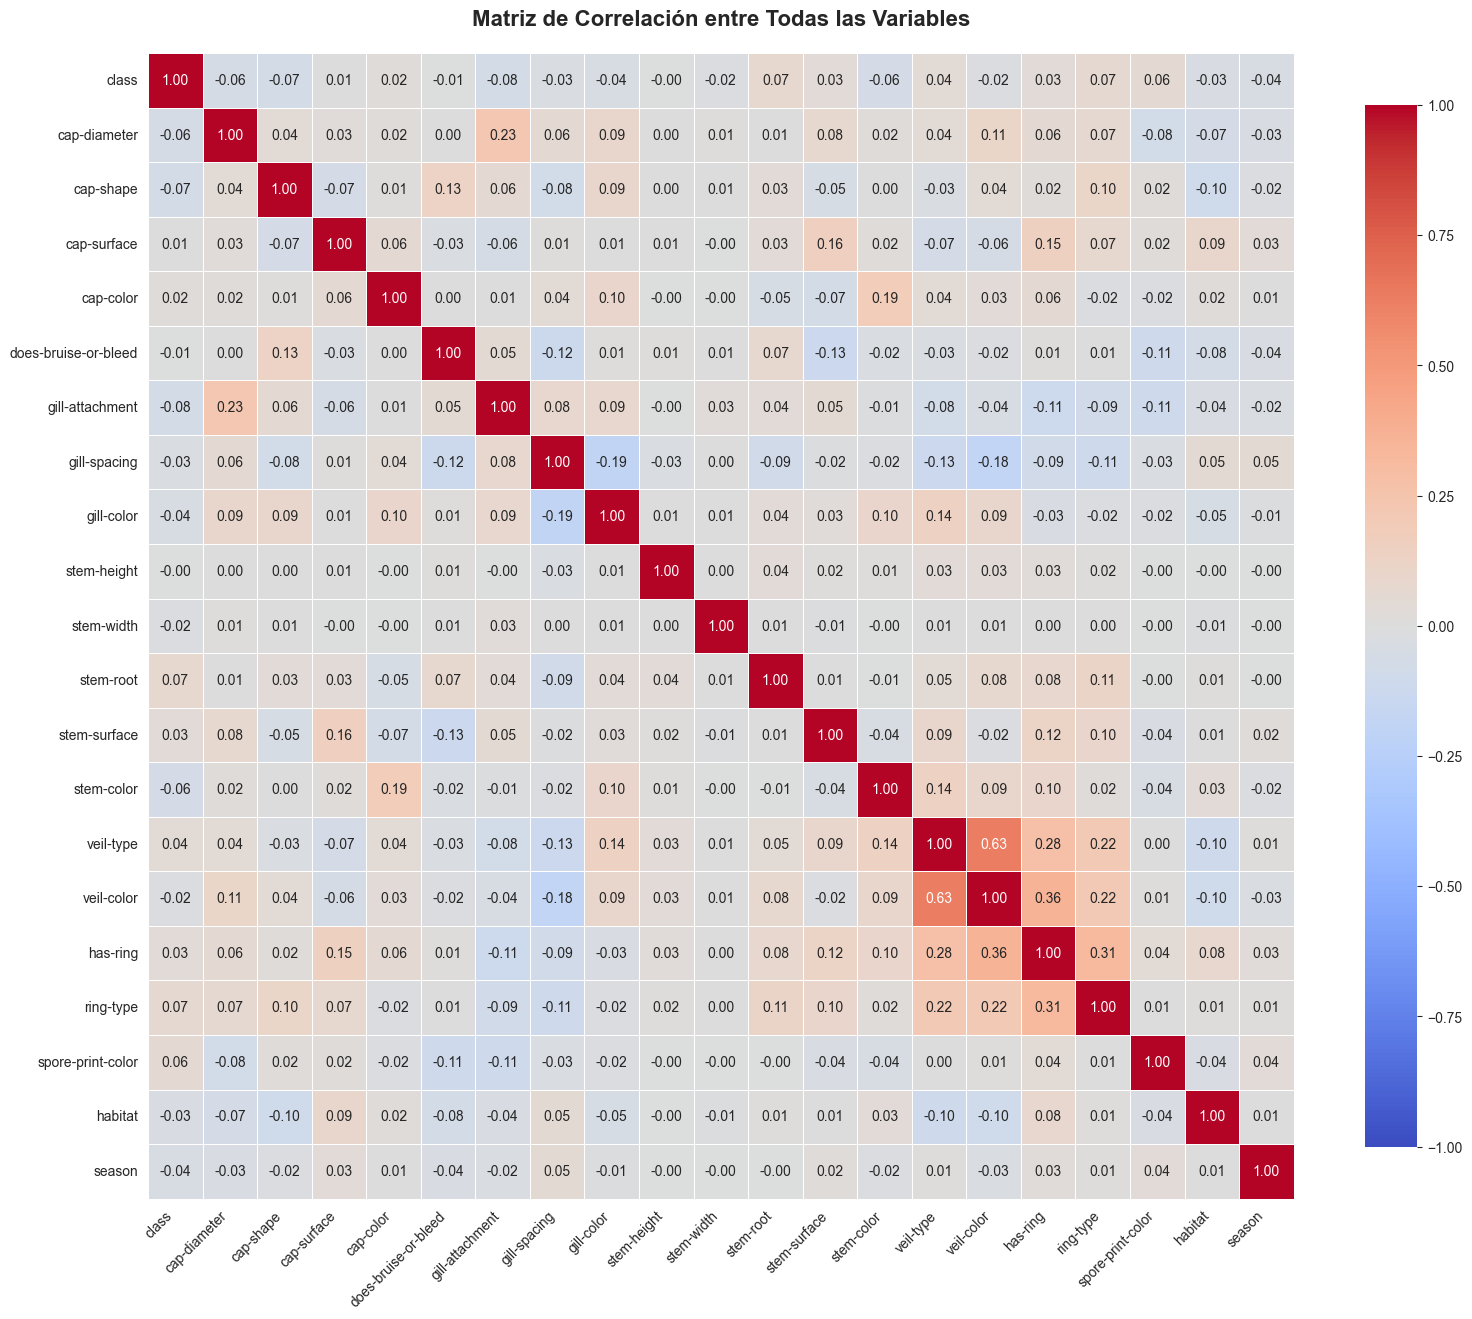

In [28]:
# Visualizar la matriz de correlación completa
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Todas las Variables', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()